# 4차시: 데이터 분석 기초 - 기초 정보 분석과 조건 추출

- 이번 시간에는 Pandas를 활용하여 데이터를 **요약, 추출, 조건 필터링**하는 방법을 학습합니다.
- 데이터프레임을 자유롭게 탐색하고 필요한 정보를 뽑아낼 수 있는 능력을 기르는 것이 목표입니다.

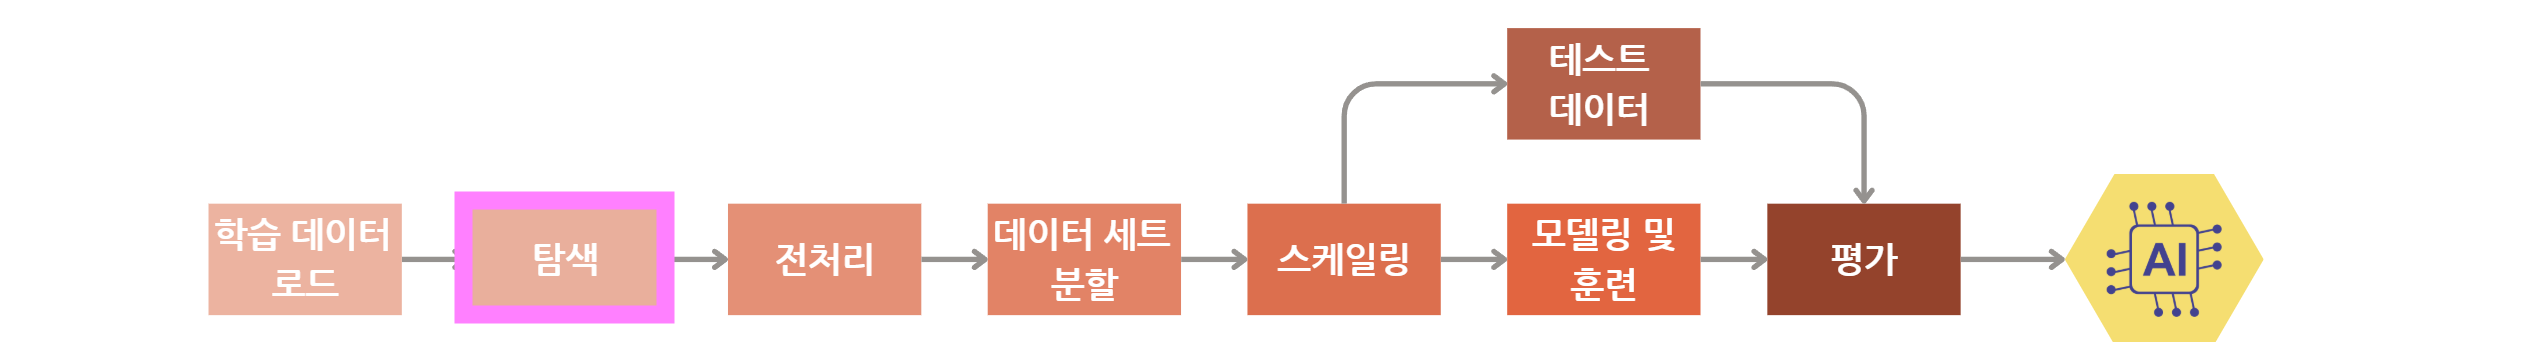

## 핵심 개념 정리

- `df.info()` : 전체 컬럼, 결측치, 타입 정보 확인
- `df.describe()` : 수치형 데이터의 기술통계량 요약
- `df.head()` : 상위 5개 데이터 보기

- `df['컬럼']` : 특정 컬럼 추출
- `df.loc[행,열]` : 라벨 기반 행/열 접근 (이름)
- `df.iloc[행,열]` : 인덱스 기반 행/열 접근 (번호)
- 조건 필터링 : `df[조건]`, `df.loc[조건, 컬럼]`

In [1]:
# 라이브러리 로드 pandas
import pandas as pd

In [3]:
# pandas 라이브러리를 사용하여 CSV 파일을 읽어옵니다.(온라인쇼핑몰_주문데이터.csv)
df=pd.read_csv('온라인쇼핑몰_주문데이터.csv')
df.head()

,주문ID,배송완료여부,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,주문번호,결제금액,배송지코드,주문채널
0,1,0,3,이지훈,남성,22.0,1,0,ORD2024-000001,7000,NaN,웹
1,2,1,1,정하영,여성,38.0,1,0,ORD2024-000002,71000,SEO-850,모바일
2,3,1,3,최민수,여성,26.0,0,0,ORD2024-000003,8000,NaN,웹
3,4,1,1,이도윤,여성,35.0,1,0,ORD2024-000004,53000,BS-743,웹
4,5,0,3,이채원,남성,35.0,0,0,ORD2024-000005,8000,NaN,웹


In [4]:
# 데이터프레임 구조 정보 요약
# 일반적인 정보 파악

'''
1. 관측치 갯수, 데이터 수, 행 수, 인스턴스 수?
2. 피쳐 수, 변수 개수, 컬럼 수?
3. 결측치 유무와 결측치 컬럼은?
4. 데이터 타입?
'''

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문ID     891 non-null    object 
 1   배송완료여부   891 non-null    int64  
 2   고객등급     891 non-null    int64  
 3   고객명      891 non-null    object 
 4   성별       891 non-null    object 
 5   나이       714 non-null    float64
 6   동시주문상품수  891 non-null    int64  
 7   쿠폰사용횟수   891 non-null    int64  
 8   주문번호     891 non-null    object 
 9   결제금액     891 non-null    int64  
 10  배송지코드    204 non-null    object 
 11  주문채널     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [5]:

# 요약 통계 정보 파악
'''
각 피쳐별 데이터 개수, 평균, 표준편차, 최소, 25%, 50%(중앙값), 75%, 최대
수치형만 적용됨
'''

df.describe()


,배송완료여부,고객등급,나이,동시주문상품수,쿠폰사용횟수,결제금액
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32214.365881
std,0.486592,0.836071,14.526497,1.102743,0.806057,49693.352438
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,8000.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14000.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31000.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512000.000000


In [6]:
# 컬럼 추출
df['나이']  # 한 개
df[['나이', '배송완료여부']]  # 여러 개

,나이,배송완료여부
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,NaN,0
889,26.0,1


In [8]:
df.loc[0, ['배송완료여부', '성별', '고객명']]  # Series

배송완료여부      0
성별         남성
고객명       이지훈
Name: 0, dtype: object

In [7]:
# 행 추출 (loc)
df.loc[[0], ['배송완료여부', '성별', '고객명']]  # DataFrame

,배송완료여부,성별,고객명
0,0,남성,이지훈


In [9]:
df.loc[[3, 9], ['배송완료여부', '성별', '고객명']]

,배송완료여부,성별,고객명
3,1,여성,이도윤
9,1,여성,김도윤


In [10]:
# 행 추출 (iloc)
df.iloc[[3, 9], [1, 4, 3]]

,배송완료여부,성별,고객명
3,1,여성,이도윤
9,1,여성,김도윤


In [11]:
# 조건 필터링
cond = df['성별'] == '여성'
df[cond].head()

,주문ID,배송완료여부,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,주문번호,결제금액,배송지코드,주문채널
1,2,1,1,정하영,여성,38.0,1,0,ORD2024-000002,71000,SEO-850,모바일
2,3,1,3,최민수,여성,26.0,0,0,ORD2024-000003,8000,NaN,웹
3,4,1,1,이도윤,여성,35.0,1,0,ORD2024-000004,53000,BS-743,웹
8,9,1,3,장채원,여성,27.0,0,2,ORD2024-000009,11000,NaN,웹
9,10,1,2,김도윤,여성,14.0,1,0,ORD2024-000010,30000,NaN,모바일


In [ ]:
# 조건 필터링 (여러 조건)
# '나이'가 10세 미만이거나 60세 이상인 경우
# '배송완료여부'와 '성별' 컬럼만 추출

cond = (df['나이'] < 10) | (df['나이'] >= 60)
df.loc[cond]
df.loc[cond, ['배송완료여부', '성별']]

In [15]:
# 조건 필터링 (여러 조건)
# '나이'가 10세 미만이거나 60세 이상인 경우
# '배송완료여부'가 1인 경우
# 위 두 조건을 모두 만족하는 행 추출

cond1 = (df['나이'] < 10) | (df['나이'] >= 60)
cond2 = (df['배송완료여부']==1)
df.loc[cond1 & cond2].head()


,주문ID,배송완료여부,고객등급,고객명,성별,나이,동시주문상품수,쿠폰사용횟수,주문번호,결제금액,배송지코드,주문채널
10,11,1,3,최도윤,여성,4.00,1,1,ORD2024-000011,17000,BS-852,웹
43,44,1,2,윤예린,여성,3.00,1,2,ORD2024-000044,42000,NaN,모바일
58,59,1,2,박민수,여성,5.00,1,2,ORD2024-000059,28000,NaN,웹
78,79,1,2,한지훈,남성,0.83,0,2,ORD2024-000079,29000,NaN,웹
165,166,1,3,박현우,남성,9.00,0,2,ORD2024-000166,21000,NaN,웹


---

## 연습문제

아래 지시사항에 따라 데이터를 추출하세요. 반드시 지시된 변수명과 조건을 사용할 것.

### 문제 1. 주문 데이터의 기본 정보를 확인하세요.
아래 가이드를 따라 데이터를 탐색하세요.
- 대상 파일: 온라인쇼핑몰_주문데이터.csv
- 해당 파일을 df_order라는 변수명으로 불러오세요.
- 관측치 개수를 찾고 `답안01` 라는 변수에 저장하세요.

In [17]:
# 여기에 코드를 작성하세요
df_order=pd.read_csv('온라인쇼핑몰_주문데이터.csv')
df_order.info()
답안01=891

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문ID     891 non-null    object 
 1   배송완료여부   891 non-null    int64  
 2   고객등급     891 non-null    int64  
 3   고객명      891 non-null    object 
 4   성별       891 non-null    object 
 5   나이       714 non-null    float64
 6   동시주문상품수  891 non-null    int64  
 7   쿠폰사용횟수   891 non-null    int64  
 8   주문번호     891 non-null    object 
 9   결제금액     891 non-null    int64  
 10  배송지코드    204 non-null    object 
 11  주문채널     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


### 문제 2. 특정 컬럼만 추출하세요.
아래 가이드를 따라 데이터를 선택하세요.

- 대상 데이터프레임: df_order
- 고객등급, 결제금액 컬럼만 추출하여 df_selected 변수에 저장하세요.
- df_selected에서 상위5개의 데이터만 출력하세요.

In [23]:
# 여기에 코드를 작성하세요
df_selected=df_order[['고객등급','결제금액']]
df_selected.head()

,고객등급,결제금액
0,3,7000
1,1,71000
2,3,8000
3,1,53000
4,3,8000


### 문제 3. 조건을 만족하는 고객 데이터를 추출하세요.
아래 조건에 해당하는 데이터를 필터링하세요.

- 대상 데이터프레임: df_order
- 조건: 나이(나이)가 60세 이상이면서 배송이 완료된(배송완료여부 = 1) 고객
- 추출 컬럼: 고객명, 성별, 결제금액
- 결과는 df_senior 변수에 저장하세요.
- 추출된 데이터 건수를 `답안03_1` 변수에 저장하세요.
- 추출된 데이터에서 결제금액의 평균값을 `답안03_2`변수에 저장하세요.


In [ ]:
# 여기에 코드를 작성하세요.
cond1=df['나이'] >= 60
cond2=df['배송완료여부']==1
df_senior=df_order.loc[cond1&cond2, ['고객명','성별','결제금액']]

답안03_1=7
답안03_2=51714.285714

df_senior

,고객명,성별,결제금액
275,한민수,여성,78000
366,정도윤,여성,75000
483,정도윤,여성,10000
570,이지훈,남성,10000
587,조지훈,남성,79000
630,박민수,남성,30000
829,정지아,여성,80000


### 문제 4. 전체 데이터에 대한 기초 정보를 확인하고 다음 보기 중 틀린 내용을 골라 답안04 변수에 저장하세요.

- 대상 데이터프레임: df_order
1. 제일 나이가 많은 고객의 나이는 80세이다.
2. '주문번호'는 정수형 타입이다.
3. 최대로 사용한 '쿠폰사용횟수'는 6회이다.
4. 평균 '결제금액'은 대략 3만2000원 정도이다.


In [ ]:
# 여기에 코드를 작성하세요.
답안04=2

In [33]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   주문ID     891 non-null    object 
 1   배송완료여부   891 non-null    int64  
 2   고객등급     891 non-null    int64  
 3   고객명      891 non-null    object 
 4   성별       891 non-null    object 
 5   나이       714 non-null    float64
 6   동시주문상품수  891 non-null    int64  
 7   쿠폰사용횟수   891 non-null    int64  
 8   주문번호     891 non-null    object 
 9   결제금액     891 non-null    int64  
 10  배송지코드    204 non-null    object 
 11  주문채널     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [35]:
df_order.describe()

,배송완료여부,고객등급,나이,동시주문상품수,쿠폰사용횟수,결제금액
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32214.365881
std,0.486592,0.836071,14.526497,1.102743,0.806057,49693.352438
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,8000.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14000.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31000.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512000.000000
